In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import xlrd

from networkx.algorithms import bipartite
import numpy as np
from numpy import genfromtxt

In [5]:
nodeList = pd.read_csv('NodeList2.csv')

In [6]:
edgeListN = pd.read_csv("EdgeListNormalized.csv")

In [7]:
nodeList.head()

,Id,Label,Type,District,State,Party,Industry,Sector
0,1,Abigail Spanberger,Rep,VA07,VA,Democrat,NaN,NaN
1,2,Adam Kinzinger,Rep,IL16,IL,Republican,NaN,NaN
2,3,Alan S. Lowenthal,Rep,CA47,CA,Democrat,NaN,NaN
3,4,Andrew Garbarino,Rep,NY02,NY,Republican,NaN,NaN
4,5,Anthony E. Gonzalez,Rep,OH16,OH,Republican,NaN,NaN


In [8]:
edgeListN.head()

,Source,Target,Weight
0,1574,77,0.019715
1,1574,77,0.019715
2,1800,77,0.019715
3,1404,62,0.018008
4,788,77,0.019715


In [9]:
edgeListRaw = pd.read_csv("EdgeListRaw.csv")

In [10]:
edgeListRaw.head()

,Source,Target,Weight
0,1574,77,500
1,1574,77,500
2,1800,77,500
3,1404,62,500
4,788,77,500


In [11]:
houseTransactions = pd.read_csv("HouseTransactions.csv")

In [12]:
houseTransactions.head()

,Source,Target,Weight,disclosure_year22,transaction_date,ticker,type,amount,Edge Weight,representative,district,industry,sector,party,Congressional Chamber
0,MSFT,Josh Gottheimer,1000,2022,2/10/2022,MSFT,purchase,"$1,000,001 - $5,000,000",1000,Josh Gottheimer,NJ05,Computer Software: Prepackaged Software,Technology,Democrat,House
1,MSFT,Josh Gottheimer,1000,2021,2/12/2021,MSFT,purchase,"$1,000,001 - $5,000,000",1000,Josh Gottheimer,NJ05,Computer Software: Prepackaged Software,Technology,Democrat,House
2,MSFT,Josh Gottheimer,1000,2021,2/12/2021,MSFT,purchase,"$1,000,001 - $5,000,000",1000,Josh Gottheimer,NJ05,Computer Software: Prepackaged Software,Technology,Democrat,House
3,MSFT,Josh Gottheimer,1000,2021,11/15/2021,MSFT,purchase,"$1,000,001 - $5,000,000",1000,Josh Gottheimer,NJ05,Computer Software: Prepackaged Software,Technology,Democrat,House
4,Alan S. Lowenthal,BLK,1,2021,9/17/2021,BLK,sale_partial,"$1,001 - $15,000",-1,Alan S. Lowenthal,CA47,Investment Bankers/Brokers/Service,Finance,Democrat,House


# Subgraph Creation

In [17]:
rawPurchases = edgeListRaw[edgeListRaw['Target']<=126]

In [18]:
rawPurchases.head()

,Source,Target,Weight
0,1574,77,500
1,1574,77,500
2,1800,77,500
3,1404,62,500
4,788,77,500


In [19]:
rawPurchases.tail()

,Source,Target,Weight
14837,435,106,1000
14838,2127,106,1
14839,2128,106,1
14840,1923,106,1
14841,665,106,1


In [21]:
rawPurchasesGraph=nx.from_pandas_edgelist(rawPurchases, 'Source', 'Target', ['Weight'])

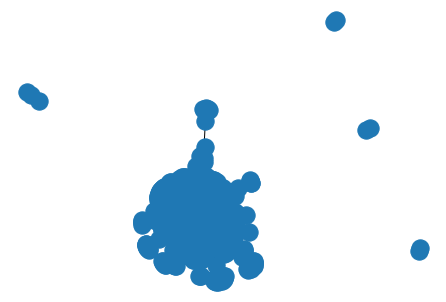

In [25]:
nx.draw(rawPurchasesGraph)

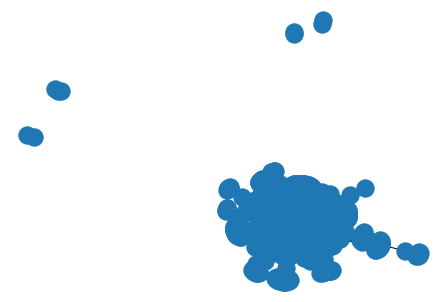

In [26]:
normalizedPurchases = edgeListN[edgeListN['Target']<=126]
normalizedPurchasesGraph=nx.from_pandas_edgelist(normalizedPurchases, 'Source', 'Target', ['Weight'])
nx.draw(normalizedPurchasesGraph)

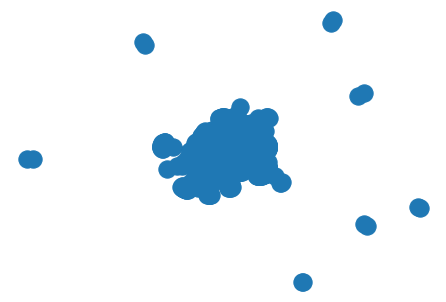

In [27]:
rawSales = edgeListRaw[edgeListRaw['Source']<=126]
rawSalesGraph=nx.from_pandas_edgelist(rawSales, 'Source', 'Target', ['Weight'])
nx.draw(rawSalesGraph)

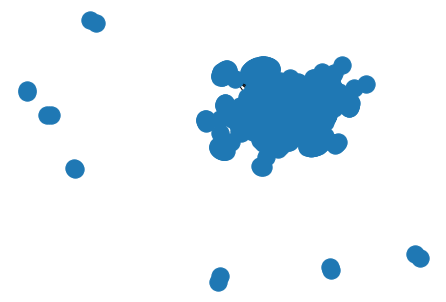

In [28]:
normalizedSales = edgeListN[edgeListN['Source']<=126]
normalizedSalesGraph=nx.from_pandas_edgelist(normalizedSales, 'Source', 'Target', ['Weight'])
nx.draw(normalizedSalesGraph)

In [29]:
nx.write_gexf(rawPurchasesGraph, "rawPurchases.gexf")
nx.write_gexf(normalizedPurchasesGraph, "normalizedPurchases.gexf")
nx.write_gexf(rawSalesGraph, "rawSales.gexf")
nx.write_gexf(normalizedSalesGraph, "normalizedSales.gexf")

# Centrality Measures

In [32]:
from networkx.algorithms.centrality.degree_alg import degree_centrality
degree_centrality(rawPurchasesGraph)

{1574: 0.0005920663114268798,
 77: 0.02368265245707519,
 1800: 0.0005920663114268798,
 1404: 0.016577856719952634,
 62: 0.16814683244523385,
 788: 0.0017761989342806393,
 2049: 0.0005920663114268798,
 1935: 0.0005920663114268798,
 35: 0.04144464179988158,
 223: 0.0017761989342806393,
 771: 0.0017761989342806393,
 119: 0.0005920663114268798,
 1388: 0.0005920663114268798,
 1469: 0.0005920663114268798,
 139: 0.019538188277087032,
 70: 0.013025458851391355,
 2163: 0.008880994671403197,
 116: 0.0017761989342806393,
 90: 0.010065127294256956,
 760: 0.0011841326228537595,
 507: 0.0011841326228537595,
 83: 0.02309058614564831,
 1661: 0.0005920663114268798,
 113: 0.0005920663114268798,
 1557: 0.0011841326228537595,
 1160: 0.0017761989342806393,
 49: 0.08407341622261692,
 143: 0.0005920663114268798,
 245: 0.015985790408525755,
 591: 0.007104795737122557,
 675: 0.013025458851391355,
 229: 0.0035523978685612786,
 115: 0.02427471876850207,
 508: 0.0017761989342806393,
 717: 0.0005920663114268798,
 

In [33]:
nx.voterank(rawPurchasesGraph, 10)

[62, 112, 95, 48, 36, 49, 30, 19, 74, 71]

In [34]:
nx.voterank(rawSalesGraph, 10)

[48, 49, 62, 112, 71, 30, 69, 19, 122, 74]

In [35]:
nx.voterank(normalizedPurchasesGraph, 10)

[62, 112, 95, 48, 36, 49, 30, 19, 74, 71]

In [36]:
nx.voterank(normalizedSalesGraph, 10)

[48, 49, 62, 112, 71, 30, 69, 19, 122, 74]

# Configuration Model and Assortativity Measures

In [37]:
import scipy.stats as stats

In [38]:
rawPurchases_assortativity = nx.degree_assortativity_coefficient(rawPurchasesGraph)
print(rawPurchases_assortativity)

-0.44915902486535014


In [40]:
normPurchases_assortativity = nx.degree_assortativity_coefficient(normalizedPurchasesGraph)
print(normPurchases_assortativity)

-0.44915902486535014


In [41]:
rawSales_assortativity = nx.degree_assortativity_coefficient(rawSalesGraph)
print(rawSales_assortativity)

-0.4447608087208379


In [42]:
normSales_assortativity = nx.degree_assortativity_coefficient(normalizedSalesGraph)
print(normSales_assortativity)

-0.4447608087208379


In [44]:
purchase_degree_sequence = list(dict(nx.degree(normalizedPurchasesGraph)).values())

model_assortativity = []
for i in range(1000):
    # Use the configuration model to create a null graph
    null_graph = nx.configuration_model(purchase_degree_sequence)
    
    null_graph.remove_edges_from(nx.selfloop_edges(null_graph)) # removes self-loops
    
    # Calculate the model's assortativity and add it to the list
    model_assortativity.append(nx.degree_assortativity_coefficient(null_graph))

In [45]:
# Prepend the real assortativity to the model list and have scipy calculate the zscores
zscores = stats.zscore([normPurchases_assortativity] + model_assortativity)

# Just print out the first score which corresponds to the real network
print(zscores[0])

-21.402567835172093


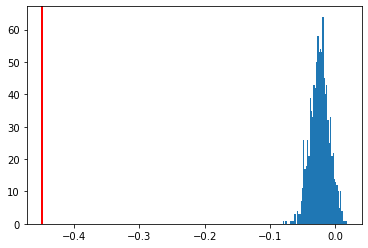

In [46]:
%matplotlib inline

# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_assortativity, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(normPurchases_assortativity, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()

-20.48349997822101


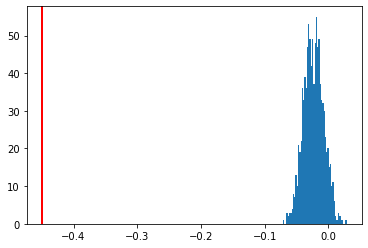

In [47]:
sales_degree_sequence = list(dict(nx.degree(normalizedSalesGraph)).values())

model_assortativity = []
for i in range(1000):
    # Use the configuration model to create a null graph
    null_graph = nx.configuration_model(sales_degree_sequence)
    
    null_graph.remove_edges_from(nx.selfloop_edges(null_graph)) # removes self-loops
    
    # Calculate the model's assortativity and add it to the list
    model_assortativity.append(nx.degree_assortativity_coefficient(null_graph))
    
# Prepend the real assortativity to the model list and have scipy calculate the zscores
zscores = stats.zscore([normSales_assortativity] + model_assortativity)

# Just print out the first score which corresponds to the real network
print(zscores[0])

%matplotlib inline

# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_assortativity, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(normPurchases_assortativity, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()

# Full Graph Party Analysis

In [49]:
edgeList = pd.read_csv ("EdgeListNormalized02.csv")

In [50]:
edgeList.head()

,Source,Target,Weight
0,PBFX,Mark E. Green,0.019715
1,PBFX,Mark E. Green,0.019715
2,SHLX,Mark E. Green,0.019715
3,MSFT,Josh Gottheimer,0.018008
4,ET,Mark E. Green,0.019715


In [57]:
for row in edgeList:
    for rep in nodeList:
        if edgeList.at(row)['Source'] == nodeList.at(rep)['Label'] or edgeList.at(row)['Target'] == nodeList.at(rep)['Label']:
            edgeList.at(row).insert(nodeList.at(rep)['Label'])

TypeError: '_AtIndexer' object is not callable